In [1]:
import pandas as pd
from nltk.corpus import stopwords
import string
import nltk
import nltk.tokenize
punc = string.punctuation
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Sentiment_news_dataframe.csv')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df.head()

,Date,Title,URL,sentiment,confidence,Unnamed: 5
0,03/10/17,Amber Enterprises files for Rs555 crore IPO,http://www.livemint.com/Money/DJCTYXYzpDnVT1Ki...,NEGATIVE,-0.987213,NaN
1,21/04/18,No need to divorce this stock ; brokerage sees...,https://www.moneycontrol.com/news/business/sto...,POSITIVE,0.946583,NaN
2,11/07/18,An evening walk down Dalal Street : Trade war ...,https://www.moneycontrol.com/news/business/mar...,POSITIVE,0.967994,NaN
3,09/01/20,Commodity outlook : Refined soya oil jumps 8 %...,https://economictimes.indiatimes.com/markets/c...,NEGATIVE,-0.879617,NaN
4,19/04/17,Nikkei : Tokyo stocks open lower after British...,http://economictimes.indiatimes.com/markets/st...,NEGATIVE,-0.941918,NaN


In [3]:
#drop irrelevant columns
df = df.drop(['Date','URL','confidence','Unnamed: 5'], axis=1)
df.head()

,Title,sentiment
0,Amber Enterprises files for Rs555 crore IPO,NEGATIVE
1,No need to divorce this stock ; brokerage sees...,POSITIVE
2,An evening walk down Dalal Street : Trade war ...,POSITIVE
3,Commodity outlook : Refined soya oil jumps 8 %...,NEGATIVE
4,Nikkei : Tokyo stocks open lower after British...,NEGATIVE


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Title      60000 non-null  object
 1   sentiment  60000 non-null  object
dtypes: object(2)
memory usage: 937.6+ KB


In [5]:
# check for null values
df.isnull().sum()


Title        0
sentiment    0
dtype: int64

In [6]:
#drop duplicates in column "Title"
df = df.drop_duplicates(subset=["Title"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59973 entries, 0 to 59999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Title      59973 non-null  object
 1   sentiment  59973 non-null  object
dtypes: object(2)
memory usage: 1.4+ MB


In [7]:
df = df.rename(columns = {'Title': 'text'})
df['text'] = df['text'].astype(str)

In [8]:
df = df.rename(columns = {'sentiment': 'Label'})
df['Label'] = df['Label'].astype(str)

In [9]:
# Replace Labels positive ,negative by 1 and 0 respectively
df['Label'] = df['Label'].replace({'POSITIVE': 1, 'NEGATIVE': 0})

In [10]:
label_column = df['Label']

# Count the number of 0s and 1s
zeros_count = label_column.value_counts()[0]
ones_count = label_column.value_counts()[1]


# Display the results
print(f"Number of 0s: {zeros_count}")
print(f"Number of 1s: {ones_count}")

Number of 0s: 29988
Number of 1s: 29985


<Axes: xlabel='Label', ylabel='count'>

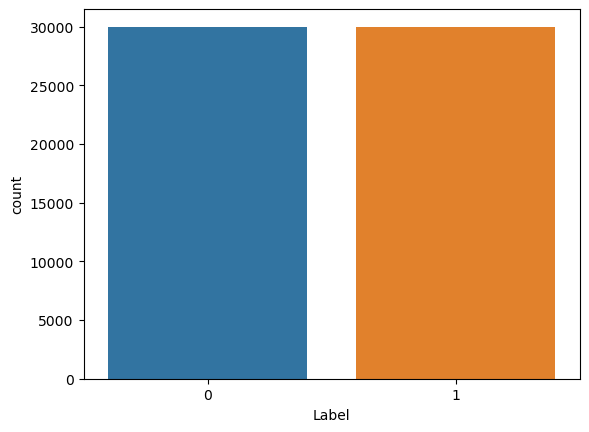

In [11]:
sns.countplot(x=df['Label'])


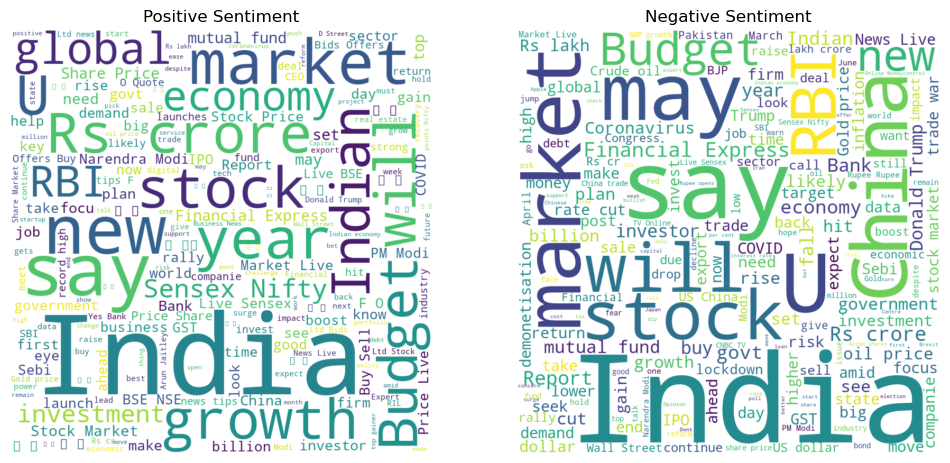

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Convert positive and negative text to strings
pos_text = ' '.join(df[df['Label'] == 1]['text'])
neg_text = ' '.join(df[df['Label'] == 0]['text'])

# Create WordCloud objects
wordcloud_pos = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(pos_text)
wordcloud_neg = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(neg_text)

# Plot the word clouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.title('Positive Sentiment')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.title('Negative Sentiment')
plt.axis('off')

plt.show()


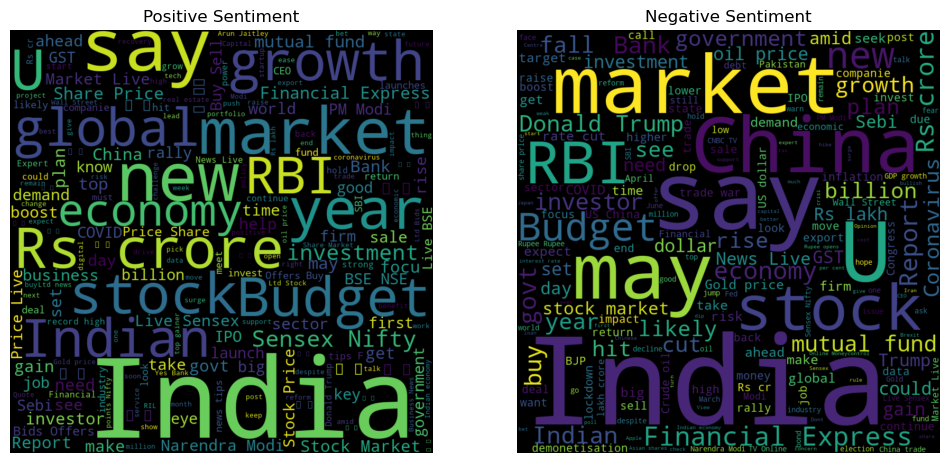

In [13]:
# Convert positive and negative text to strings
positive_text = ' '.join(df[df['Label'] == 1]['text'])
negative_text = ' '.join(df[df['Label'] == 0]['text'])

# Set stopwords
stopwords = set(stopwords.words('english'))

# Create WordCloud objects
wordcloud_pos = WordCloud(width=800, height=800, background_color='black', stopwords=stopwords, min_font_size=10).generate(positive_text)
wordcloud_neg = WordCloud(width=800, height=800, background_color='black', stopwords=stopwords, min_font_size=10).generate(negative_text)

# Plot the word clouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.title('Positive Sentiment')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.title('Negative Sentiment')
plt.axis('off')

plt.show()